0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

Text(0.5,0,'Feature importance')

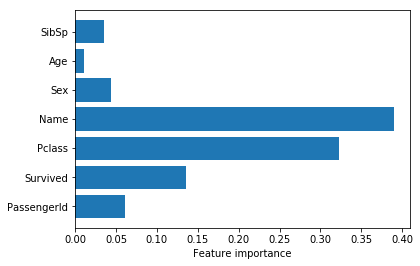

In [3]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import mglearn
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


train = pd.read_csv("/opt/notebooks/train.csv")
test = pd.read_csv("/opt/notebooks/test.csv")
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna('S')
#df = pd.DataFrame(data=train)
#null_val = df.isnull().sum()
#percent = 100 * df.isnull().sum()/len(df)
#kesson_table = pd.concat([null_val, percent], axis=1)
#kesson_table_ren_columns = kesson_table.rename(
#columns = {0 : '欠損数', 1 : '%'})
#print(kesson_table_ren_columns)
train["Sex"] = train["Sex"].replace('male', 0)
train["Sex"] = train["Sex"].replace('female', 1)
train["Embarked"] = train["Embarked"].replace('S', 0)
train["Embarked"] = train["Embarked"].replace('C', 1)
train["Embarked"] = train["Embarked"].replace('Q', 2)


sc = StandardScaler()
train[["Age"]] = sc.fit_transform(train[["Age"]])

#scFare = StandardScaler()
#train[["Fare"]] = scFare.fit_transform(train[["Fare"]])

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna('S')
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
# testも変換
test["Sex"] = test["Sex"].replace('male', 0)
test["Sex"] = test["Sex"].replace('female', 1)
test["Embarked"] = test["Embarked"].replace('S', 0)
test["Embarked"] = test["Embarked"].replace('C', 1)
test["Embarked"] = test["Embarked"].replace('Q', 2)

test[["Age"]] = sc.fit_transform(test[["Age"]])
#test[["Fare"]] = scFare.fit_transform(test[["Fare"]])


target = train['Survived'].values
#print(target)
features_one = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].values
#max_depth = 10
#min_samples_split = 5
my_tree_one = GradientBoostingClassifier(random_state = 0)
my_tree_one = my_tree_one.fit(features_one, target)

test_features = test[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].values

#print(test.isnull().sum())

my_prediction = my_tree_one.predict(test_features)

PassengerId = np.array(test["PassengerId"]).astype(int)

my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
#my_solution.head()
my_solution.to_csv("gradient_boosting_classifier.csv", index_label = ["PassengerId"])

print(train['Fare'])

n_features = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].shape[1]
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html
plt.barh(range(n_features), my_tree_one.feature_importances_, align='center')
plt.yticks(np.arange(n_features), train.columns.values)
plt.xlabel('Feature importance')
#fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#for i, (ax, tree) in enumerate(zip(axes.ravel(), my_tree_one.estimators_)):
  # Number of features of the model must match the input. Model n_features is 7 and input n_features is 2   
  # mglearn.plots.plot_tree_partition(features_one, target, tree, ax=ax)

#print(my_tree_one.estimators_)

